# **Preprocessing data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/student-mat.csv"
student_data = pd.read_csv(path, sep=';')

In [ ]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# Calculating avg of G1, G2 and G3
student_data['avg'] = student_data[['G1', 'G2','G3']].mean(axis=1)

In [ ]:
print(student_data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'avg'],
      dtype='object')


In [ ]:
print(student_data['school'].unique())
df = student_data

['GP' 'MS']


### Converting binary data (From binary to numerical)

In [ ]:
# Map categorical variables
df.school = df.school.map({'GP':0, 'MS':1})
df.sex = df.sex.map({'F':0, 'M':1})
df.address = df.address.map({'U':0, 'R':1})
df.famsize = df.famsize.map({'LE3':0, 'GT3':1})
df.Pstatus = df.Pstatus.map({'T':0, 'A':1})
df.Mjob = pd.factorize(df.Mjob)[0]
df.Fjob	 = pd.factorize(df.Fjob	)[0]
df.reason	 = pd.factorize(df.reason	)[0]
df.guardian	 = pd.factorize(df.guardian	)[0]
df.schoolsup = df.schoolsup.map({'yes':0, 'no':1})
df.famsup = df.famsup.map({'yes':0, 'no':1})
df.paid = df.paid.map({'yes':0, 'no':1})
df.activities = df.activities.map({'yes':0, 'no':1})
df.nursery = df.nursery.map({'yes':0, 'no':1})
df.higher = df.higher.map({'yes':0, 'no':1})
df.internet = df.internet.map({'yes':0, 'no':1})
df.romantic = df.romantic.map({'yes':0, 'no':1})

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
avg           0
dtype: int64

In [ ]:
# Define the function to categorize G2 values
def categorize_g2(x):
    if 0 <= x <= 4:
        return 'E'
    elif 5 <= x <= 8:
        return 'D'
    elif 9 <= x <= 12:
        return 'C'
    elif 13 <= x <= 16:
        return 'B'
    elif 17 <= x <= 20:
        return 'A'
    else:
        return None  # Handle cases outside the expected range

# Apply the function using map
df['G2T'] = df['G2'].map(categorize_g2)

In [ ]:
print(df['G2T'].unique())

['D' 'B' 'C' 'A' 'E']


In [ ]:
df.G2T	 = pd.factorize(df.G2T)[0]

In [ ]:
df.G2T

0      0
1      0
2      0
3      1
4      2
      ..
390    2
391    1
392    0
393    2
394    2
Name: G2T, Length: 395, dtype: int64


#**Regression tree**

In [ ]:
# Define features and target
X = df.drop(['G1', 'G2T','avg'], axis = 1)
y = df.G1

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 316 entries, 23 to 37
Series name: G1
Non-Null Count  Dtype
--------------  -----
316 non-null    int64
dtypes: int64(1)
memory usage: 4.9 KB


In [ ]:
decisionT = DecisionTreeRegressor(max_depth=5)
decisionT.fit(X_train, y_train)
y_pred = decisionT.predict(X_test)

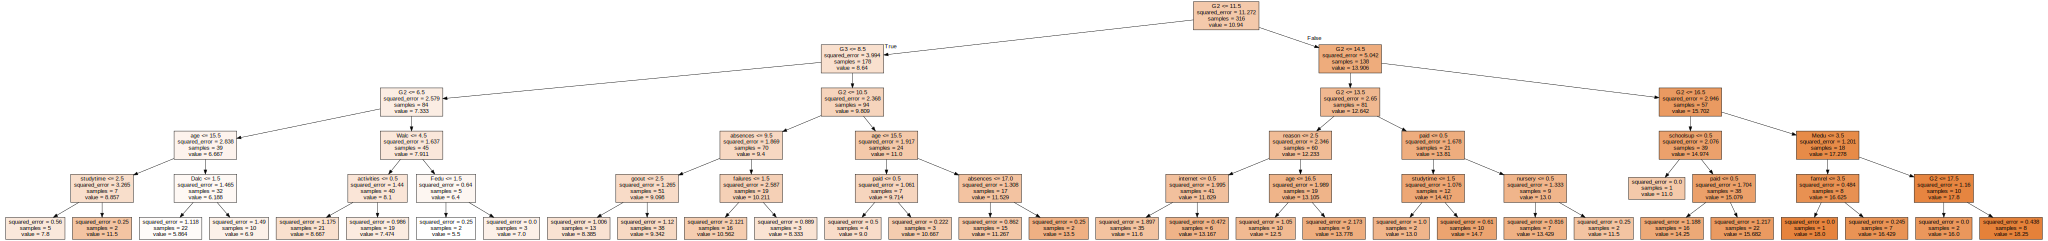

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(decisionT, feature_names=list(X), class_names=sorted(y.unique()), filled=True)
graphviz.Source(dot_data)

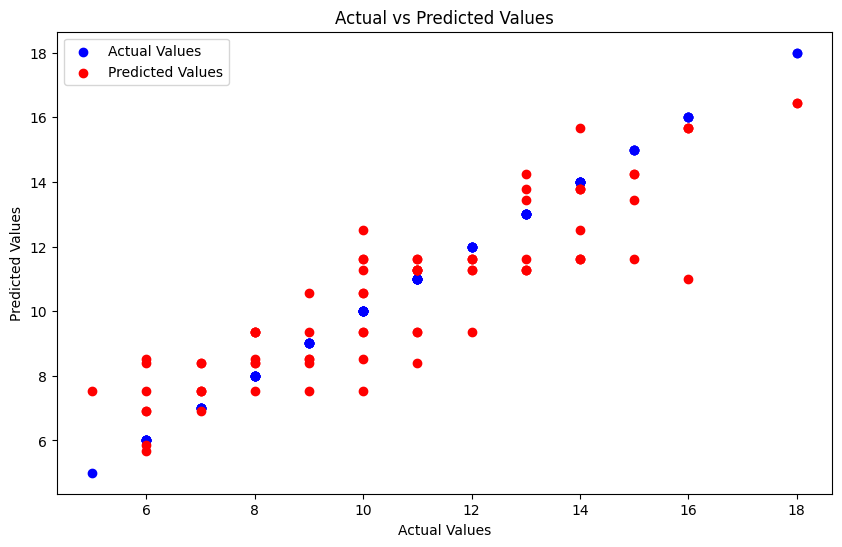

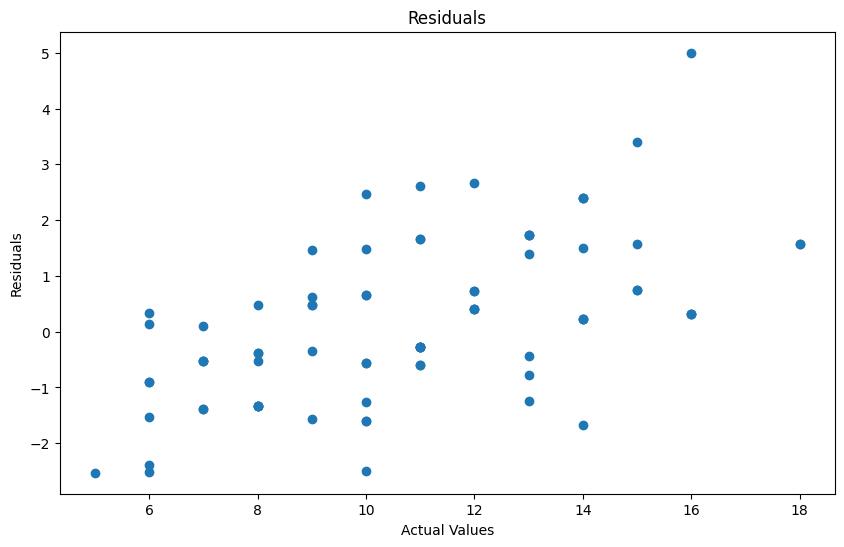

In [ ]:
# Plot the predicted values
plt.figure(figsize=(10, 6))
actual_scatter = plt.scatter(y_test, y_test, color='blue', label='Actual Values')
predicted_scatter = plt.scatter(y_test, y_pred, color='red', label='Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals')
plt.show()

In [ ]:
# Extract the points from the scatter plot
actual_points = actual_scatter.get_offsets().tolist()
predicted_points = predicted_scatter.get_offsets().tolist()

# Convert the points to a DataFrame
actual_df = pd.DataFrame(actual_points, columns=['x', 'y'])
predicted_df = pd.DataFrame(predicted_points, columns=['x', 'y'])

# Print the DataFrames
print("Actual Points:")
print(actual_df.to_string(index=False))
print("\n-----------------")
print("\nPredicted Points:")
print(predicted_df.to_string(index=False))

Actual Points:
   x    y
 6.0  6.0
10.0 10.0
 6.0  6.0
 9.0  9.0
11.0 11.0
12.0 12.0
 9.0  9.0
14.0 14.0
11.0 11.0
 9.0  9.0
14.0 14.0
15.0 15.0
 6.0  6.0
 5.0  5.0
 8.0  8.0
13.0 13.0
15.0 15.0
14.0 14.0
 7.0  7.0
10.0 10.0
12.0 12.0
18.0 18.0
 8.0  8.0
10.0 10.0
16.0 16.0
 6.0  6.0
13.0 13.0
10.0 10.0
 6.0  6.0
15.0 15.0
14.0 14.0
12.0 12.0
 8.0  8.0
11.0 11.0
13.0 13.0
 7.0  7.0
11.0 11.0
 7.0  7.0
10.0 10.0
11.0 11.0
 9.0  9.0
10.0 10.0
16.0 16.0
 7.0  7.0
12.0 12.0
14.0 14.0
18.0 18.0
 8.0  8.0
13.0 13.0
 8.0  8.0
 6.0  6.0
11.0 11.0
13.0 13.0
 7.0  7.0
 9.0  9.0
11.0 11.0
 7.0  7.0
16.0 16.0
 8.0  8.0
 6.0  6.0
 8.0  8.0
10.0 10.0
14.0 14.0
16.0 16.0
13.0 13.0
 8.0  8.0
11.0 11.0
15.0 15.0
 9.0  9.0
11.0 11.0
13.0 13.0
10.0 10.0
10.0 10.0
14.0 14.0
12.0 12.0
10.0 10.0
11.0 11.0
14.0 14.0
12.0 12.0

-----------------

Predicted Points:
   x         y
 6.0  7.529412
10.0 10.562500
 6.0  5.666667
 9.0  9.342105
11.0  9.342105
12.0 11.266667
 9.0  8.521739
14.0 11.600000
11.0 11.6000

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score is:', r2_score(y_test, y_pred))

Mean Absolute Error: 1.1466893596563545
Mean Squared Error: 2.1112927191463795
Root Mean Squared Error: 1.4530288087806034
R Squared Score is: 0.7854327005342362


G2 0.830206757412732
G3 0.08486839462342115
age 0.020299724957557157
paid 0.010640605245874835
absences 0.008098789613804957
studytime 0.007611489174513054
reason 0.0066013123411860644
schoolsup 0.005062457774722271
activities 0.004433301211817906
Walc 0.004011082048787788
internet 0.003925860519056675
failures 0.003920296710802603
goout 0.002773137333613258
Dalc 0.0023059147960955147
Medu 0.0019161938247775944
nursery 0.001806771387522474
Fedu 0.0008431599808437833
famrel 0.0006747510428708984
traveltime 0.0
sex 0.0
school 0.0
romantic 0.0
higher 0.0
health 0.0
guardian 0.0
freetime 0.0
famsup 0.0
famsize 0.0
address 0.0
Pstatus 0.0
Mjob 0.0
Fjob 0.0


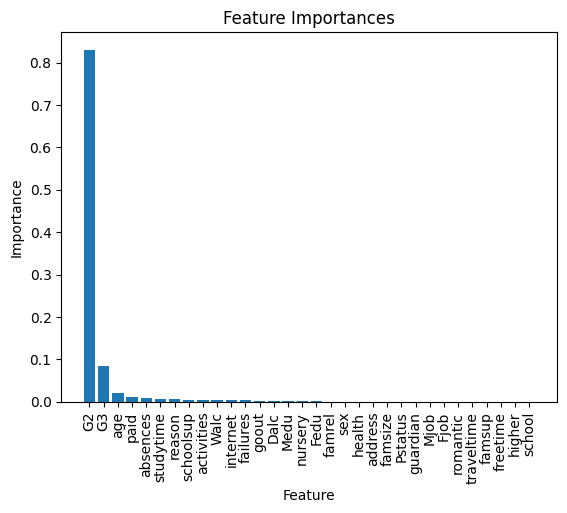

In [ ]:
# Get feature importance
for importance, name in sorted(zip(decisionT.feature_importances_, X_train.columns),reverse=True):
 print (name, importance)

import matplotlib.pyplot as plt
import numpy as np

# Sort feature importances in descending order
sorted_indices = np.argsort(decisionT.feature_importances_)[::-1]

# Create a bar plot
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), decisionT.feature_importances_[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
# Perform k-fold cross-validation
k = 5
kFold = cross_val_score(decisionT, X, y, cv=k, scoring='neg_mean_squared_error')
kFold

array([-11.89891539, -20.65280139, -12.56500395, -16.75710811,
       -15.32880792])

In [ ]:
# Calculate the mean and standard deviation of the cross-validation scores
mean_kFold = np.mean(kFold)
std_kFold = np.std(kFold)

print(f'Mean MSE: {-mean_kFold:.2f}')
print(f'Standard Deviation of MSE: {std_kFold:.2f}')

Mean MSE: 15.44
Standard Deviation of MSE: 3.15


In [ ]:
# Fit the model on the training data
decisionT.fit(X_train, y_train)

# Predict on the test data
y_pred = decisionT.predict(X_test)

#**Classification**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    int64  
 1   sex         395 non-null    int64  
 2   age         395 non-null    int64  
 3   address     395 non-null    int64  
 4   famsize     395 non-null    int64  
 5   Pstatus     395 non-null    int64  
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    int64  
 9   Fjob        395 non-null    int64  
 10  reason      395 non-null    int64  
 11  guardian    395 non-null    int64  
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    int64  
 16  famsup      395 non-null    int64  
 17  paid        395 non-null    int64  
 18  activities  395 non-null    int64  
 19  nursery     395 non-null    i

<Axes: >

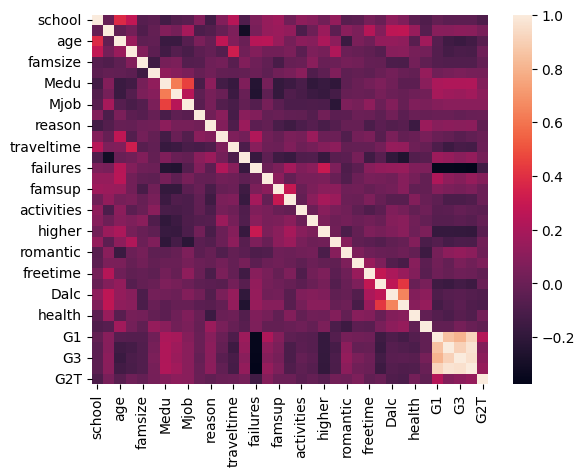

In [ ]:
# Correlation matrix
df.corr()
sns.heatmap(df.corr())

In [ ]:
X = df.drop(['G2T','G2','avg'], axis = 1)
y = df.G2T

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred2)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[11  0  5  0  1]
 [ 0 12  2  1  0]
 [ 6  2 36  0  1]
 [ 0  1  0  1  0]
 [ 0  0  0  0  0]]


For accuracy:

Accuracy
=
11
+
𝑇
𝑁/(11
+
𝑇
𝑁
+
6
+
6)


Overall Accuracy
=
Total Correct Predictions/Total Predictions=

(11
+
12
+
36
+
1)/79
=
60/79
≈
0.759

In [ ]:
classificationT = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
classificationT.fit(X_train, y_train)
pred2 = classificationT.predict(X_test)

In [ ]:
pred2

array([2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 1, 3, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 4, 4, 2, 3, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred2)

0.759493670886076

In [ ]:
from sklearn.metrics import classification_report
print(f'Classification Report: \n{classification_report(y_test, pred2)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        17
           1       0.80      0.80      0.80        15
           2       0.84      0.80      0.82        45
           3       0.50      0.50      0.50         2
           4       0.00      0.00      0.00         0

    accuracy                           0.76        79
   macro avg       0.56      0.55      0.55        79
weighted avg       0.78      0.76      0.77        79



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Regression classification Score of the model
print('Score For Train Data : {}'.format(classificationT.score(X_train,y_train)))
print('Score For Test Data : {}'.format(classificationT.score(X_test,y_test)))
print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred2))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred2))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('\n')



Score For Train Data : 1.0
Score For Test Data : 0.759493670886076
The mean absolute error: 0.45569620253164556
The mean squared error: 0.9620253164556962
The root mean squared error: 0.9808288925473679




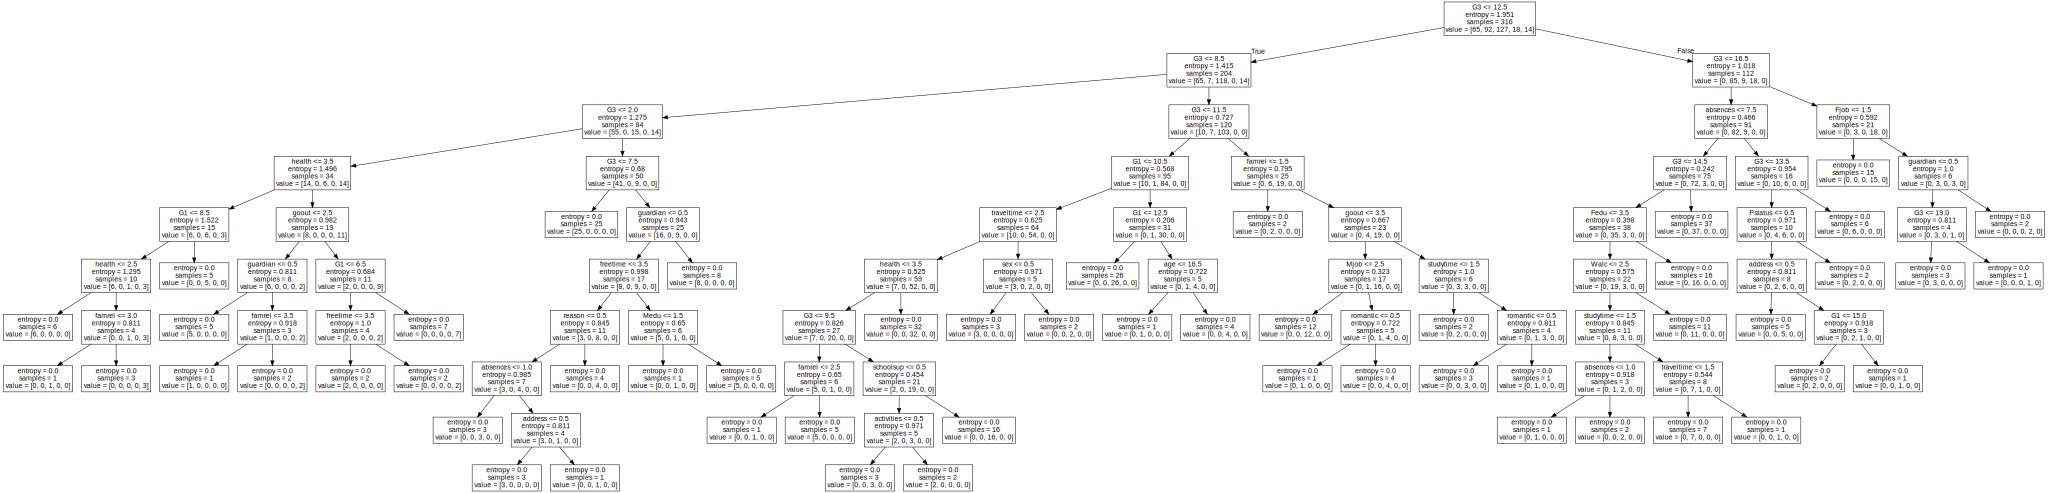

In [ ]:
export_graphviz(classificationT,
                out_file = "classificationT.dot",
                feature_names = X_train.columns)

with open("classificationT.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Cross validation

In [ ]:
# Perform k-fold cross-validation
k = 5
kFoldCT = cross_val_score(classificationT, X_train, y_train, cv=k, scoring='accuracy')

In [ ]:
# Calculate the mean and standard deviation of the cross-validation scores
mean_kFoldCT = np.mean(kFoldCT)
std_kFoldCT = np.std(kFoldCT)

print(f'Mean Accuracy: {mean_kFoldCT:.2f}')
print(f'Standard Deviation of Accuracy: {std_kFoldCT:.2f}')

Mean Accuracy: 0.75
Standard Deviation of Accuracy: 0.03


In [ ]:
# Fit the model on the training data
classificationT.fit(X_train, y_train)

# Predict on the test data
pred2 = classificationT.predict(X_test)

# **Random Forests**

In [ ]:
X = df.drop(['G2T','avg','G1','G2','G3'], axis = 1)
y = df.avg

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

In [ ]:
bagged_model = RandomForestRegressor(max_features = 10, random_state = 1)
bagged_model.fit(X_train, y_train)

RandomForestRegressor(max_features=10, random_state=1)

7.715493389592121

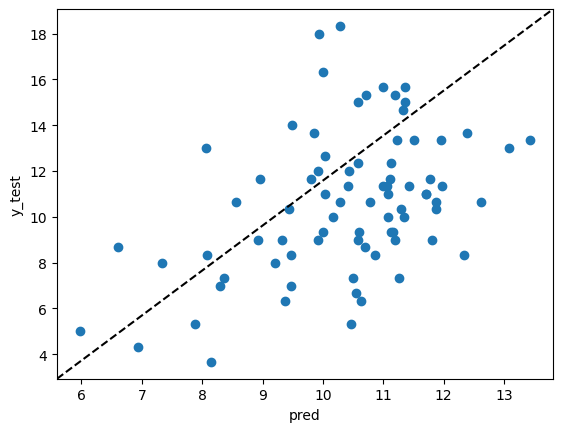

In [ ]:
predictions = bagged_model.predict(X_test)

plt.scatter(predictions,
            y_test,
            label = 'medv')

plt.plot([0, 1],
         [0, 1],
         '--k',
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, predictions)

In [ ]:
# Random forests: using 6 features
RF_boston = RandomForestRegressor(max_features = 6, random_state = 1)

RF_boston.fit(X_train, y_train)

pred = RF_boston.predict(X_train)
mean_squared_error(y_train, pred)

1.7162491209564

In [ ]:
# Perform k-fold cross-validation
k = 5
kFoldRF = cross_val_score(RF_boston, X_train, y_train, cv=k, scoring='neg_mean_squared_error')
kFoldRF

array([-13.17579618, -10.85886473, -11.69149947, -11.02600741,
       -10.84914021])

In [ ]:
# Calculate the mean and standard deviation of the cross-validation scores for RF
mean_kFoldRF = np.mean(kFoldRF)
std_kFoldRF = np.std(kFoldRF)
mean_kFoldRF

-11.520261599426806

In [ ]:
# Since cross_val_score returns negative MSE, we take the negative of the mean and std
mean_mse_cv = -mean_kFoldRF
std_mse_cv = std_kFoldRF

print(f'Mean Cross-Validation MSE: {mean_mse_cv:.2f}')
print(f'Standard Deviation of Cross-Validation MSE: {std_mse_cv:.2f}')

# Predict on the test data
predictions_test = RF_boston.predict(X_test)

Mean Cross-Validation MSE: 11.52
Standard Deviation of Cross-Validation MSE: 0.88


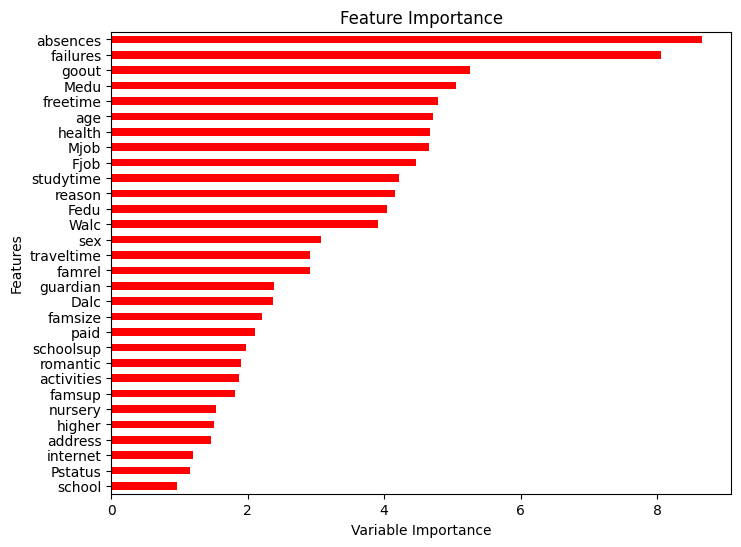

In [ ]:
Importance = pd.DataFrame({'Importance':RF_boston.feature_importances_*100},
                          index = X.columns)

Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                              color = 'r', figsize=(8, 6))

plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().legend_ = None

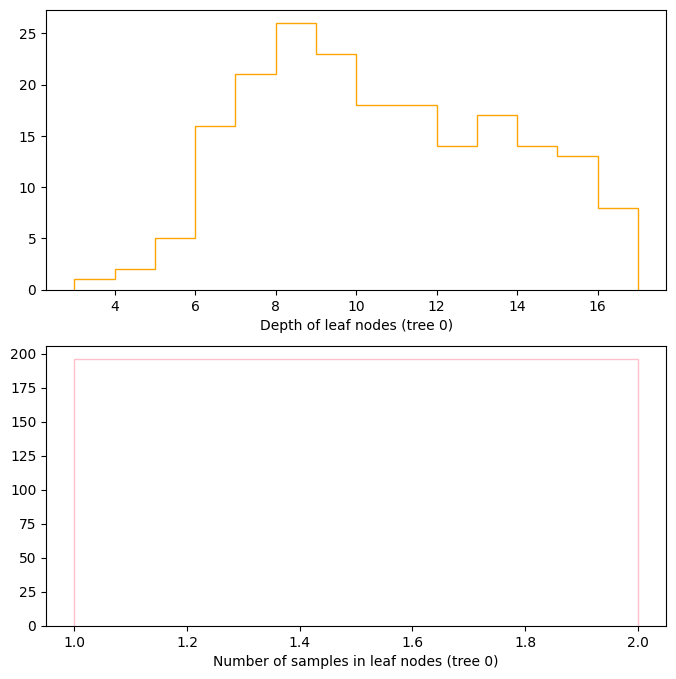

In [ ]:
from sklearn.tree import _tree

def calc_leaf_depths(tree, node_id = 0):

     '''
     tree.children_left and tree.children_right store ids
     of left and right chidren of a given node
     '''
     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     '''
     If a given node is terminal,
     both left and right children are set to _tree.TREE_LEAF
     '''
     if left_child == _tree.TREE_LEAF:

         '''
         Set depth of terminal nodes to 0
         '''
         depths = np.array([0])

     else:

         '''
         Get depths of left and right children and
         increment them by 1
         '''
         left_depths = calc_leaf_depths(tree, left_child) + 1
         right_depths = calc_leaf_depths(tree, right_child) + 1

         depths = np.append(left_depths, right_depths)

     return depths

def calc_leaf_samples(tree, node_id = 0):

     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     if left_child == _tree.TREE_LEAF:

         samples = np.array([tree.n_node_samples[node_id]])

     else:

         left_samples = calc_leaf_samples(tree, left_child)
         right_samples = calc_leaf_samples(tree, right_child)

         samples = np.append(left_samples, right_samples)

     return samples

def draw_tree_RF(ensemble, tree_id=0):

     plt.figure(figsize=(8,8))
     plt.subplot(211)

     tree = ensemble.estimators_[tree_id].tree_

     depths = calc_leaf_depths(tree)
     plt.hist(depths, histtype='step', color='orange',
              bins=range(min(depths), max(depths)+1))

     plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)

     plt.subplot(212)

     samples = calc_leaf_samples(tree)
     plt.hist(samples, histtype='step', color='pink',
              bins=range(min(samples), max(samples)+1))

     plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)

     plt.show()

draw_tree_RF(RF_boston)

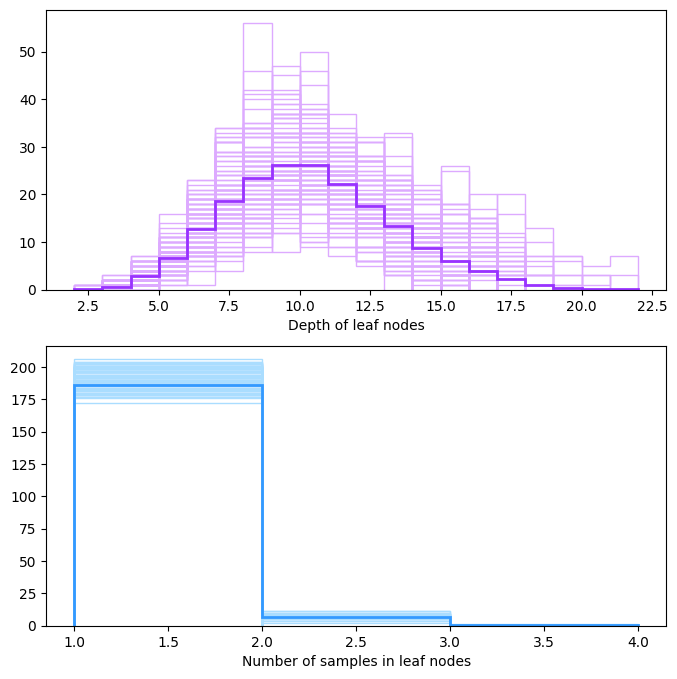

In [ ]:
def draw_ensemble_model(ensemble):

     plt.figure(figsize=(8,8))
     plt.subplot(211)

     depths_all = np.array([], dtype=int)

     for x in ensemble.estimators_:
         tree = x.tree_
         depths = calc_leaf_depths(tree)
         depths_all = np.append(depths_all, depths)
         plt.hist(depths, histtype='step', color='#ddaaff',
                  bins=range(min(depths), max(depths)+1))

     plt.hist(depths_all, histtype='step', color='#9933ff',
              bins=range(min(depths_all), max(depths_all)+1),
              weights=np.ones(len(depths_all))/len(ensemble.estimators_),
              linewidth=2)
     plt.xlabel("Depth of leaf nodes")

     samples_all = np.array([], dtype=int)

     plt.subplot(212)

     for x in ensemble.estimators_:
         tree = x.tree_
         samples = calc_leaf_samples(tree)
         samples_all = np.append(samples_all, samples)
         plt.hist(samples, histtype='step', color='#aaddff',
                  bins=range(min(samples), max(samples)+1))

     plt.hist(samples_all, histtype='step', color='#3399ff',
              bins=range(min(samples_all), max(samples_all)+1),
              weights=np.ones(len(samples_all))/len(ensemble.estimators_),
              linewidth=2)
     plt.xlabel("Number of samples in leaf nodes")

     plt.show()

draw_ensemble_model(RF_boston)